Import needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyneb as pn

Read observation in the obs object

In [2]:
obs = pn.Observation(obsFile='./observations1.dat', fileFormat='lines_in_rows', err_default=0.05)

Add 100 synthetic observations, based on the observed intensities and the errors on them (here default value is 5%)

In [3]:
obs.addMonteCarloObs(N=100)

Reset Hbeta to 100, it hase no error by definition

In [4]:
l = obs.getLine(label='H1r_4861A')
l.obsIntens = np.ones_like(l.obsIntens) * 100

Correct observations from reddening

In [5]:
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=2.85)

In [6]:
obs.correctData(normWave=4861.)

Have a look at the line intensities: 101 values for each one (the first value is the original one).

In [7]:
obs.printIntens()

S4_10.5m      4.076    5.048    3.844    3.908    4.187    4.290    3.981    3.480    5.221    5.766    2.930    4.989    4.498    3.841    4.303    3.528    3.894    4.896    5.824    4.189    3.668    3.537    4.367    2.743    3.109    6.021    3.761    3.619    3.759    4.394    3.181    3.705    5.032    4.700    4.137    3.278    4.624    3.215    5.417    5.685    4.320    4.413    4.997    4.297    4.485    3.607    3.787    4.795    3.359    3.935    3.031    3.634    2.909    4.581    4.349    4.831    3.291    2.728    3.619    5.664    3.936    4.018    4.782    4.232    4.061    3.915    4.472    3.762    3.691    4.011    3.946    4.166    4.409    4.231    4.493    4.020    4.236    3.614    4.946    4.286    4.851    4.081    3.855    3.565    4.970    4.113    3.518    4.581    3.632    3.682    3.615    4.338    3.889    4.325    4.483    3.449    3.600    3.183    3.974    4.779    4.704
Ne2_12.8m     4.826    6.226    4.358    4.910    5.100    5.019    4.992    4.1

Plot the histogram of [OIII]/H$\beta$

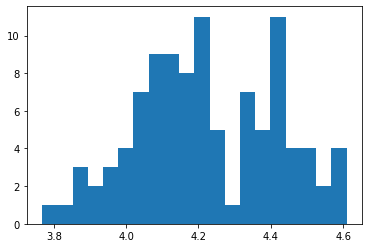

In [8]:
f, ax = plt.subplots()
ax.hist(obs.getIntens()['O3_5007A']/obs.getIntens()['H1r_4861A'], bins=20);

Instantiate the diag object to compute the diagnostics

In [9]:
diag = pn.Diagnostics()

Consider all the diagnostics available given the observed lines

In [10]:
diag.addDiagsFromObs(obs)

Have a look at the diagnostics

In [11]:
diag.diags

{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 '[OII] 3726/3729': ('O2', 'L(3726)/L(3729)', 'RMS([E(3729), E(3726)])'),
 '[OII] 3727+/7325+': ('O2',
  '(L(3726)+L(3729))/(B("7319A+")+B("7330A+"))',
  'RMS([E(3726)*L(3726)/(L(3726)+L(3729)), E(3729)*L(3729)/(L(3726)+L(3729)),BE("7319A+")*B("7319A+")/(B("7319A+")+B("7330A+")),BE("7330A+")*B("7330A+")/(B("7319A+")+B("7330A+"))])'),
 '[OIII] 4363/5007': ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SII] 4069/4076': ('S2', 'L(4069)/L(4076)', 'RMS([E(4069), E(4076)])'),
 '[SII] 4072+/6720+': ('S2',
  '(L(4069)+L(4076))/(L(6716)+L(6731))',
  'RMS([E(6716)*L(6716)/(L(6716)+L(6731)), E(6731)*L(6731)/(L(6716)+L(673

Get a list of all the atoms string involved in the observations

In [12]:
all_atoms = obs.getUniqueAtoms()

In [13]:
all_atoms

array(['Ar3', 'H1r', 'N2', 'Ne2', 'Ne3', 'O1', 'O2', 'O3', 'S2', 'S3',
       'S4'], dtype='<U3')

Creat a dictionnary of all the emisGrids that are doable from the atoms previously defined.

In [14]:
emisDict = pn.getEmisGridDict(atom_list=all_atoms)

warng getEmisGridDict: Emission map not found: ./pypics//emis_H1r.pypic
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng getEmisGridDict: No H1r EmisGrid


In [15]:
emisDict

{'Ar3': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e8570970>,
 'N2': <pyneb.core.emisGrid.EmisGrid at 0x7fe5028db130>,
 'Ne2': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e86a3be0>,
 'Ne3': <pyneb.core.emisGrid.EmisGrid at 0x7fe520191a60>,
 'O1': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e8570400>,
 'O2': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e859a3d0>,
 'O3': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e84ebf40>,
 'S2': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e84eb940>,
 'S3': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e84eba60>,
 'S4': <pyneb.core.emisGrid.EmisGrid at 0x7fe4e84ebc70>}

Plot the diagnostic diagram from the previously defined dictionnary. Only the 1rst value of the observations, the original one.

/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/diags.py:636: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X, Y, diag_map, levels=[diag_value], colors=col, linestyles=style)


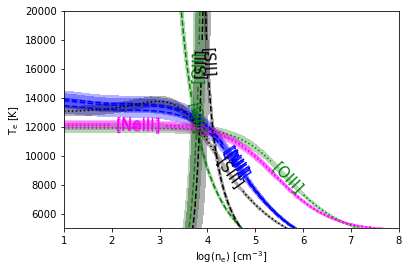

In [16]:
diag.plot(emis_grids=emisDict, obs=obs, i_obs=0)

Compute Te and Ne from the crossing points of every synthetic observations.

In [17]:
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs)

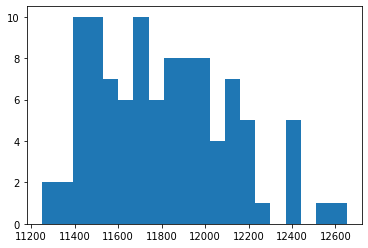

In [18]:
f, ax = plt.subplots()
ax.hist(T_O3, bins=20);

In [19]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.1f} +/- {np.nanstd(np.log10(N_S2)):.1f}  cm-3')

Te = 11792.9 K +/- 307.5
log Ne = 3.8 +/- 0.2  cm-3


The following needs to have keras, scikit and ai4neb installed. It used machine learning to accelerate the computation of electron temperature and density. 

In [20]:
pn.config.import_ai4neb()

In [21]:
N_MonteCarlo = 10000 # do not try this without use_ANN = True, this will take too much time
obs = pn.Observation(obsFile='./observations1.dat', fileFormat='lines_in_rows')
obs.addMonteCarloObs(N=10000)
l = obs.getLine(label='H1r_4861A')
l.obsIntens = np.ones_like(l.obsIntens) * 100
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=2.85)
obs.correctData(normWave=4861.)
diag = pn.Diagnostics()
diag.addDiagsFromObs(obs)
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs, use_ANN=True)

In [22]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.2f} +/- {np.nanstd(np.log10(N_S2)):.2f}  cm-3')

Te = 11748.6 K +/- 4185.2
log Ne = 3.83 +/- 0.65  cm-3


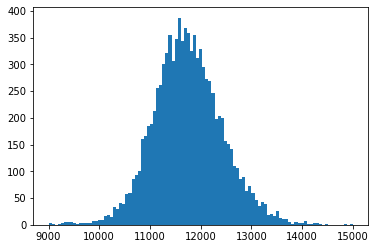

In [23]:
f, ax = plt.subplots()
ax.hist(T_O3, bins=np.linspace(9000, 15000, 100));

Redo the computation of reddening correction using coherent H$\alpha$/H$\beta$, taking into account previously determined Te and Ne

In [25]:
H1r = pn.RecAtom('H', 1)
r_theo = H1r.getEmissivity(T_O3, N_S2, wave=6563, product=False) / H1r.getEmissivity(T_O3, N_S2, wave=4861, product=False)
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=r_theo)
obs.correctData(normWave=4861.)
diag = pn.Diagnostics()
diag.addDiagsFromObs(obs)
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs, use_ANN=True)

/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/pynebcore.py:3712: RuntimeWarning: divide by zero encountered in log10
  logd = np.log10(deng)
/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/pynebcore.py:3730: RuntimeWarning: divide by zero encountered in true_divide
  (1./temg, logd), method=method)


In [26]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.2f} +/- {np.nanstd(np.log10(N_S2)):.2f}  cm-3')

Te = 11742.3 K +/- 3882.3
log Ne = 3.80 +/- nan  cm-3


/tmp/ipykernel_798200/3161403910.py:2: RuntimeWarning: divide by zero encountered in log10
  print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.2f} +/- {np.nanstd(np.log10(N_S2)):.2f}  cm-3')
/mnt/md5/data/morisset/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


In [27]:
#Create a dictionnary that olds all the atom objects
atomDict = pn.getAtomDict(atom_list=all_atoms)
ion_ab_dic = {}
for line in obs.getSortedLines():
    atom = atomDict[line.atom]
    ion_ab_dic[line.label] = atom.getIonAbundance(line.corrIntens, T_O3, N_S2, to_eval=line.to_eval)

warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: rec data not available for Ne3
warng _ManageAtomicData: rec data not available for S2
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: rec data not available for S4


/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/pynebcore.py:957: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(x)
/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/pynebcore.py:1509: RuntimeWarning: divide by zero encountered in true_divide
  resultArray[j][i] = CST.KCOLLRATE / tem ** 0.5 / stat_weight_j * Omegas[lev_j-1, lev_i-1]
/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/pynebcore.py:1511: RuntimeWarning: divide by zero encountered in true_divide
  np.exp((energy_i - energy_j) / (CST.BOLTZMANN_ANGK * tem)) *
/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/pynebcore.py:1809: RuntimeWarning: invalid value encountered in multiply
  coeff_matrix[row, col] = den_rav * q[col, row] + A[col, row]
/mnt/md5/data/morisset/insync/GoogleDrive_chris_morisset/Pro/PyNeb_devel/pyneb/core/pynebcore.py:1812: RuntimeWarning: invalid valu

In [28]:
ion_ab_dic

{'Ar3_7136A': array([2.18484551e-07, 3.06706347e-07, 2.29769668e-07, ...,
        1.52966129e-07, 1.80568422e-07, 2.55118149e-07]),
 'H1r_4861A': array([1., 1., 1., ..., 1., 1., 1.]),
 'H1r_6563A': array([1.00039148, 0.99917671, 1.00021535, ..., 1.00050778, 1.00023101,
        1.00048053]),
 'N2_5755A': array([2.53370702e-06, 4.54018444e-06, 3.11521031e-06, ...,
        2.15134065e-06, 1.74844463e-06, 3.41861580e-06]),
 'N2_6548A': array([2.38109860e-06, 4.86240107e-06, 2.70216612e-06, ...,
        1.82612169e-06, 2.02012162e-06, 2.65702392e-06]),
 'N2_6584A': array([2.24101277e-06, 3.89545661e-06, 2.89089927e-06, ...,
        1.86298786e-06, 2.28403299e-06, 2.75542151e-06]),
 'Ne2_12.8m': array([5.70450070e-06, 6.13082950e-06, 4.88538761e-06, ...,
        4.77481347e-06, 3.78295464e-06, 7.99187081e-06]),
 'Ne3_15.6m': array([1.21802239e-05, 1.49720117e-05, 9.25125731e-06, ...,
        1.02647384e-05, 8.55075529e-06, 1.63687705e-05]),
 'Ne3_3869A': array([1.25983291e-05, 1.98005434e-05

Define O/H = O$^+$/H$^+$ + O$^{++}$/H$^+$, where O$^+$ is the mean value of the ionic abundances obtained from the two [OII]3726, 29 lines. No ICF is used here.

In [29]:
OH = ion_ab_dic['O3_5007A'] + 0.5*(ion_ab_dic['O2_3726A'] + ion_ab_dic['O2_3729A'])

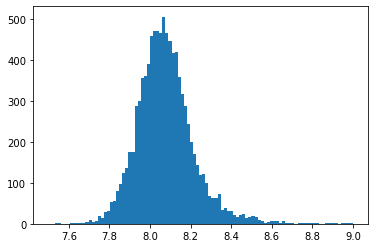

In [30]:
f, ax = plt.subplots()
ax.hist(12 + np.log10(OH), bins = np.linspace(7.5, 9.0, 100));

In [31]:
print(f'12 + log(OH) = {12+np.nanmedian(np.log10(OH)):.2f} +/- {np.nanstd(np.log10(OH)):.2f}')

12 + log(OH) = 8.07 +/- 0.18
